In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Index2018.csv")

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
data_copy.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [ ]:
data_copy.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting the Data

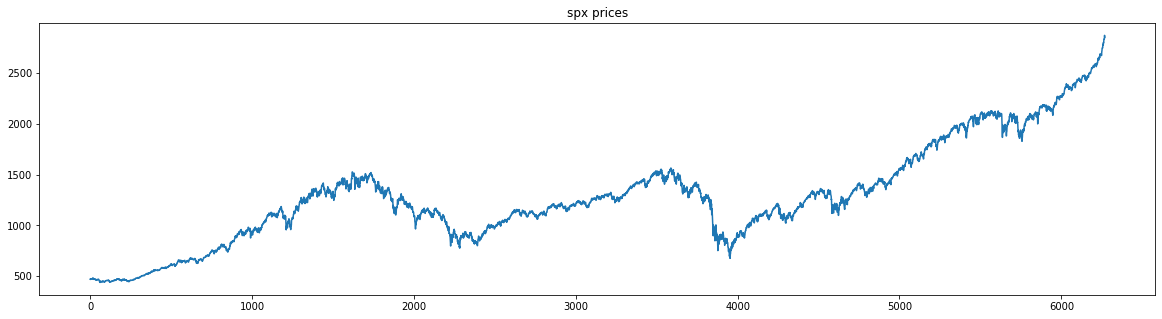

In [ ]:
import matplotlib.pyplot as plt

data_copy.spx.plot(figsize = (20,5), title = 'spx prices')

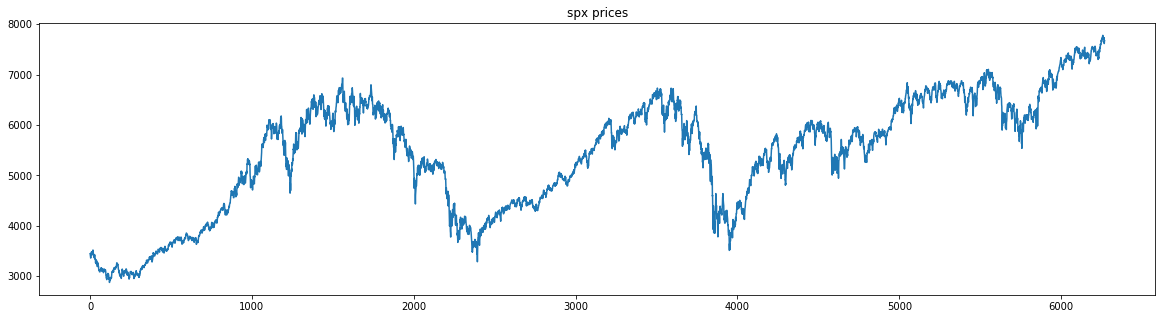

In [ ]:
data_copy.ftse.plot(figsize = (20,5), title = 'spx prices')

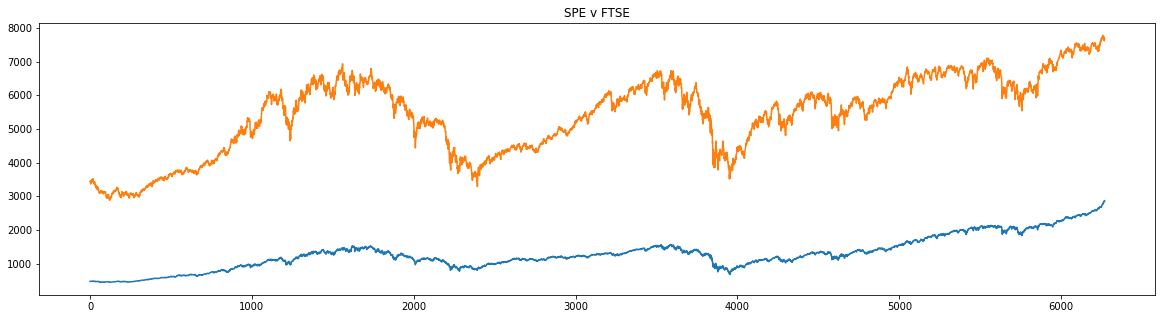

In [ ]:
data_copy.spx.plot(figsize = (20,5), title = 'spx prices')
data_copy.ftse.plot(figsize = (20,5), title = 'spx prices')
plt.title("SPE v FTSE")
plt.show()

In [ ]:
import scipy.stats
import pylab

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.46056102841175, 1288.1275420815123, 0.9767273150948813))

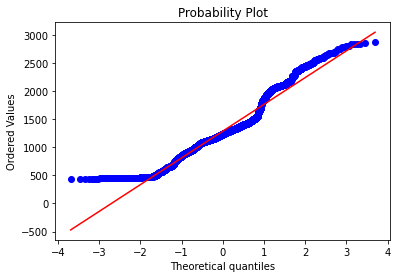

In [ ]:
scipy.stats.probplot(data_copy.spx,plot = pylab)

## Lenght of Time Period

In [ ]:
data_copy.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [ ]:
data_copy.date = pd.to_datetime(data_copy.date, dayfirst= True)

In [ ]:
data_copy.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
data_copy.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting index

In [ ]:
data_copy.set_index("date", inplace = True)

In [ ]:
data_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Sitting the desire frequency

In [ ]:
data_copy = data_copy.asfreq('b')

In [ ]:
data_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling missing values

In [ ]:
data_copy.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
data_copy.spx = data_copy.spx.fillna(method = 'ffill')

In [ ]:
data_copy.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
data_copy.ftse = data_copy.ftse.fillna(method='bfill')

In [ ]:
data_copy.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [ ]:
data_copy.dax = data_copy.dax.fillna(value = data_copy.dax.mean())

In [ ]:
data_copy.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [ ]:
data_copy.nikkei = data_copy.nikkei.fillna(value = data_copy.dax.mean())

In [ ]:
data_copy.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Symplifying dataset

In [ ]:
data_copy['Market_value'] = data_copy.spx

In [ ]:
data_copy.describe()

,spx,dax,ftse,nikkei,Market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14586.200842,1288.642547
std,487.868210,2752.604984,1145.568370,4051.956757,487.868210
min,438.920000,1911.700000,2876.600000,6080.063363,438.920000
25%,992.715221,4070.460000,4487.880000,10695.600000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [ ]:
del data_copy['spx'], data_copy['dax'], data_copy['ftse'], data_copy['nikkei']

In [ ]:
data_copy.describe()

,Market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting data

In [ ]:
size = int(len(data_copy)*0.8)

In [ ]:
df = data_copy.iloc[:size]

In [ ]:
df_test = data_copy.iloc[size:]

In [ ]:
df.tail()

,Market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [ ]:
df_test.head()

,Market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# White noise

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt #ACF
import statsmodels.tsa.stattools as sts #stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
wn = np.random.normal(loc= df.Market_value.mean(), scale= df.Market_value.std(), size = len(df))

In [ ]:
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.describe()

,Market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1086.453725
std,292.559287,295.360063
min,438.920000,73.377980
25%,914.620000,888.594382
50%,1144.650000,1083.880641
75%,1316.280729,1284.687570
max,1570.252238,2153.450673


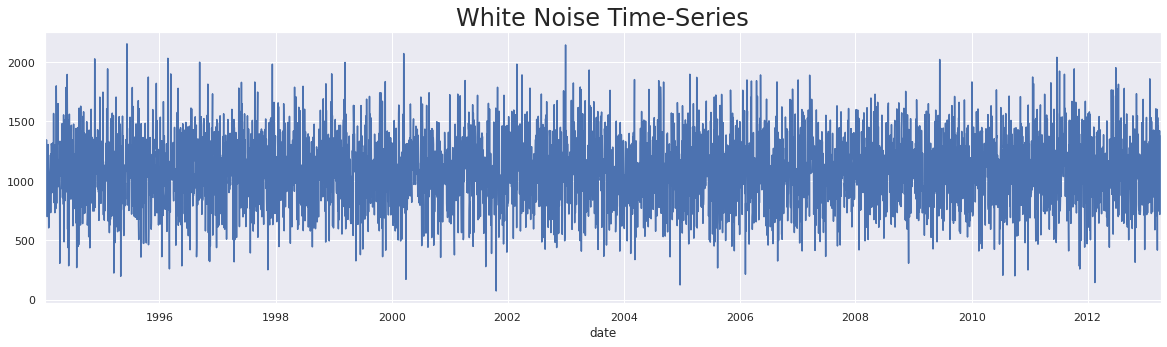

In [ ]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size = 24)
plt.show()

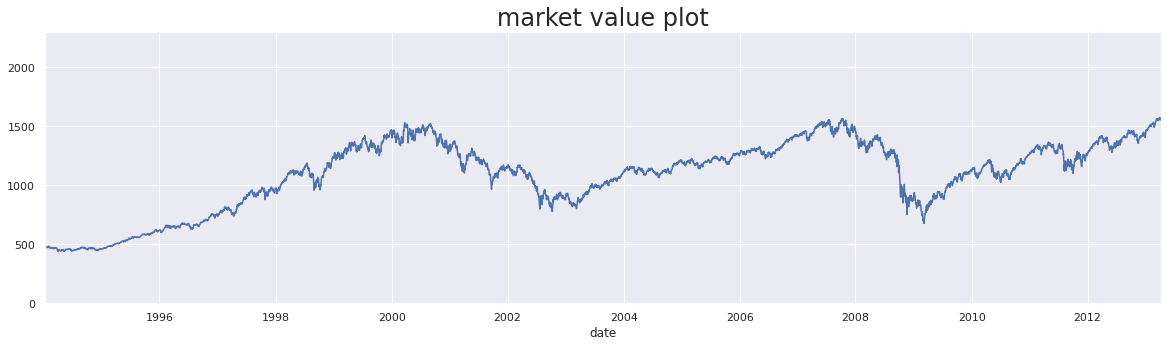

In [ ]:
df.Market_value.plot(figsize=(20,5))
plt.title("market value plot", size = 24)
plt.ylim(0, 2300)
plt.show()

# Random Walk

In [ ]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [ ]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [ ]:
df['rw']= rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Market_value,wn,rw
date,,,
1994-01-07,469.90,1724.032329,1122.139662
1994-01-10,475.27,1310.812333,1080.347860
1994-01-11,474.13,600.121817,1082.095245
1994-01-12,474.17,911.781198,1083.639265
1994-01-13,472.47,730.986955,1067.146255


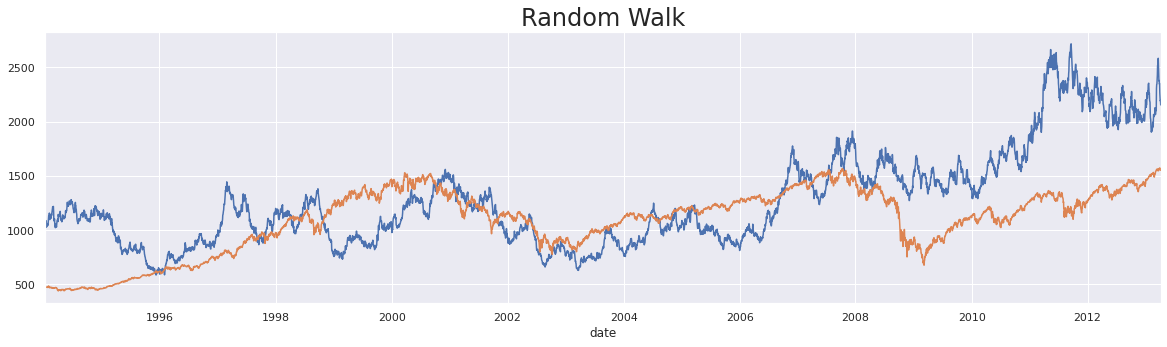

In [ ]:
df.rw.plot(figsize=(20,5))
plt.title("Random Walk", size= 24)
df.Market_value.plot()

plt.show()


# Stationarity

In [ ]:
sts.adfuller(df.Market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
sts.adfuller(df.wn)

(-70.18441319238967,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70910.1118058512)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

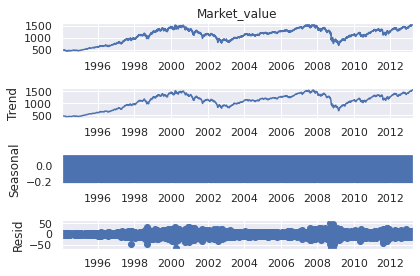

In [ ]:
s_dec_additive = seasonal_decompose(df.Market_value, model = "additive")
s_dec_additive.plot()
plt.show()

# ACF

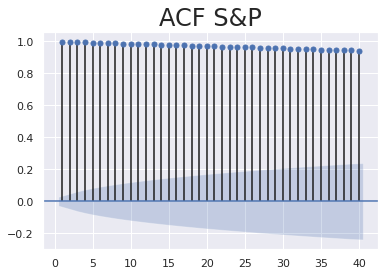

In [ ]:
sgt.plot_acf(df.Market_value, lags = 40, zero = False)
plt.title("ACF S&P", SIZE =24)
plt.show()

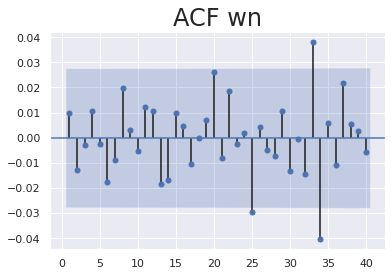

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF wn", SIZE= 24)
plt.show()

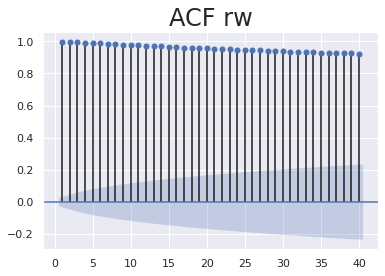

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF rw", SIZE= 24)
plt.show()

# PACF

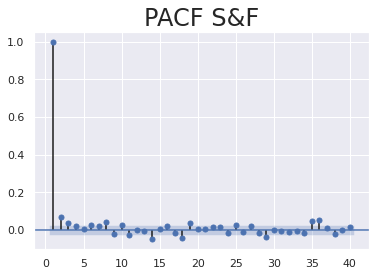

In [ ]:
sgt.plot_pacf(df.Market_value, lags = 40, zero=False, method =('ols'))
plt.title('PACF S&F', size = 24)
plt.show()

# AR Model

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
model_ar = ARMA(df.Market_value, order = (1,0))
results_ar = model_ar.fit()
results_ar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 16 Nov 2022   AIC                          40200.776
Time:                        17:54:52   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.2798    227.744      4.673      0.000     617.910    1510.650
ar.L1.Market_value     0.9994      0.001   1911.623      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_2 = ARMA(df.Market_value, order=(2,0))
result_ar_2 = model_ar_2.fit()
result_ar_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -20085.614
Method:                       css-mle   S.D. of innovations             13.206
Date:                Wed, 16 Nov 2022   AIC                          40179.227
Time:                        17:54:52   BIC                          40205.313
Sample:                    01-07-1994   HQIC                         40188.368
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1290.1449   1982.659      0.651      0.515   -2595.796    5176.085
ar.L1.Market_value     0.9301      0.012     74.851      0.000       0.906       0.954
ar.L2.Market_value     0.0695      0.012      5.564      0.000       0.045       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
AR.2          -14.3818           +0.0000j           14.3818            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_3 = ARMA(df.Market_value, order=(3,0))
result_ar_3 = model_ar_3.fit()
result_ar_3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -20082.347
Method:                       css-mle   S.D. of innovations             13.198
Date:                Wed, 16 Nov 2022   AIC                          40174.695
Time:                        17:54:53   BIC                          40207.302
Sample:                    01-07-1994   HQIC                         40186.121
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1058.3478    263.761      4.013      0.000     541.386    1575.310
ar.L1.Market_value     0.9276      0.014     68.497      0.000       0.901       0.954
ar.L2.Market_value     0.0376      0.019      1.990      0.047       0.001       0.075
ar.L3.Market_value     0.0343      0.014      2.431      0.015       0.007       0.062
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -1.0481           -5.2961j            5.3988           -0.2811
AR.3           -1.0481           +5.2961j            5.3988            0.2811
-----------------------------------------------------------------------------
"""

In [ ]:
model_ar_4 = ARMA(df.Market_value, order=[4,0])
result_ar_4 = model_ar_4.fit()
result_ar_4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -20081.256
Method:                       css-mle   S.D. of innovations             13.195
Date:                Wed, 16 Nov 2022   AIC                          40174.511
Time:                        17:54:55   BIC                          40213.639
Sample:                    01-07-1994   HQIC                         40188.222
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1053.8627    265.926      3.963      0.000     532.657    1575.068
ar.L1.Market_value     0.9270      0.014     68.589      0.000       0.900       0.953
ar.L2.Market_value     0.0368      0.019      1.953      0.051      -0.000       0.074
ar.L3.Market_value     0.0148      0.019      0.771      0.441      -0.023       0.053
ar.L4.Market_value     0.0209      0.014      1.478      0.139      -0.007       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -3.9299           -0.0000j            3.9299           -0.5000
AR.3            1.1090           -3.3115j            3.4923           -0.1986
AR.4            1.1090           +3.3115j            3.4923            0.1986
-----------------------------------------------------------------------------
"""

In [ ]:
from scipy.stats.distributions import chi2
 #DF:degrees of freedom
def LLR_test(mod_1,mod_2, DF=1):
  #.llf extracts the log-liklihood
  L1 = mod_1.fit().llf
  L2 = mod_2.fit().llf
  #test statistic
  LR = (2*(L2-L1))
  #P-value
  p = chi2.sf(LR,DF).round(3)
  return p

In [ ]:
LLR_test(model_ar_2, model_ar_3)

0.011

In [ ]:
LLR_test(model_ar_3, model_ar_4)

0.139

# The DF-Test

In [ ]:
sts.adfuller(df.Market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
df['returns'] = df.Market_value.pct_change(1).mul(100)
df = df.iloc[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sts.adfuller(df.returns)

(-17.034457190981144,
 8.28053702031742e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 16035.926219345134)

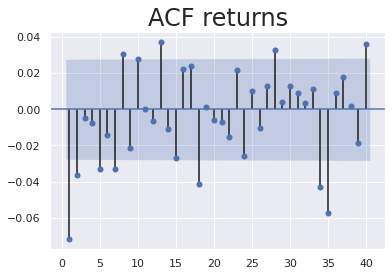

In [ ]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF returns", SIZE= 24)
plt.show()

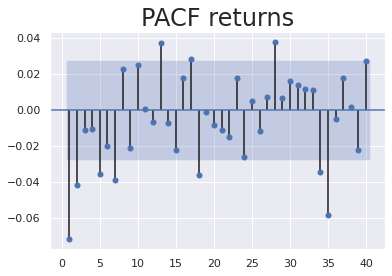

In [ ]:
sgt.plot_pacf(df.returns, lags = 40, zero=False, method =('ols'))
plt.title('PACF returns', size = 24)
plt.show()

# AR(1) for Returns

In [ ]:
model_ret_ar_1 = ARMA(df.returns, order =(1,0))
result_ret_ar_1 = model_ret_ar_1.fit()
result_ret_ar_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -8067.541
Method:                       css-mle   S.D. of innovations              1.207
Date:                Wed, 16 Nov 2022   AIC                          16141.081
Time:                        17:55:01   BIC                          16160.645
Sample:                    01-10-1994   HQIC                         16147.937
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.016      1.959      0.050   -1.03e-05       0.062
ar.L1.returns    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

# Higher_lag AR Models for Returns

In [ ]:
model_ret_ar_2 = ARMA(df.returns, order =(2,0))
result_ret_ar_2 = model_ret_ar_2.fit()
result_ret_ar_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -8063.177
Method:                       css-mle   S.D. of innovations              1.206
Date:                Wed, 16 Nov 2022   AIC                          16134.354
Time:                        17:55:01   BIC                          16160.439
Sample:                    01-10-1994   HQIC                         16143.494
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.042      0.041       0.001       0.061
ar.L1.returns    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.returns    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8154j            4.8986           -0.2794
AR.2           -0.8987           +4.8154j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.003

In [ ]:
model_ret_ar_3 = ARMA(df.returns, order =(3,0))
result_ret_ar_3 = model_ret_ar_3.fit()
result_ret_ar_3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -8062.879
Method:                       css-mle   S.D. of innovations              1.206
Date:                Wed, 16 Nov 2022   AIC                          16135.758
Time:                        17:55:01   BIC                          16168.364
Sample:                    01-10-1994   HQIC                         16147.184
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0311      0.015      2.065      0.039       0.002       0.061
ar.L1.returns    -0.0754      0.014     -5.339      0.000      -0.103      -0.048
ar.L2.returns    -0.0425      0.014     -3.005      0.003      -0.070      -0.015
ar.L3.returns    -0.0109      0.014     -0.772      0.440      -0.039       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8476           -3.9608j            4.0505           -0.2164
AR.2            0.8476           +3.9608j            4.0505            0.2164
AR.3           -5.5964           -0.0000j            5.5964           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.44

# Normalizing Values

In [ ]:
benchmark = df.Market_value.iloc[0]
df['norm'] = df.Market_value.div(benchmark).mul(100)
sts.adfuller(df.norm)

(-1.7396871077371316,
 0.4107891338207856,
 18,
 5001,
 {'1%': -3.431658270286891,
  '5%': -2.8621181140235223,
  '10%': -2.5670777307913744},
 24351.278699350325)

In [ ]:
benchmark_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(benchmark_ret).mul(100)
sts.adfuller(df.norm_ret)

(-17.034457190981183,
 8.280537020316944e-30,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 60636.5822032878)

# Normalized Returns

In [ ]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order=(1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood              -30515.434
Method:                       css-mle   S.D. of innovations            105.618
Date:                Wed, 16 Nov 2022   AIC                          61036.869
Time:                        17:55:02   BIC                          61056.432
Sample:                    01-10-1994   HQIC                         61043.724
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7248      1.391      1.959      0.050      -0.001       5.451
ar.L1.norm_ret    -0.0719      0.014     -5.108      0.000      -0.099      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -13.9069           +0.0000j           13.9069            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
model_norm_ret_ar_2 = ARMA(df.norm_ret, order=(2,0))
results_norm_ret_ar_2 = model_norm_ret_ar_2.fit()
results_norm_ret_ar_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood              -30511.071
Method:                       css-mle   S.D. of innovations            105.527
Date:                Wed, 16 Nov 2022   AIC                          61030.142
Time:                        17:55:02   BIC                          61056.226
Sample:                    01-10-1994   HQIC                         61039.282
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7234      1.334      2.042      0.041       0.109       5.338
ar.L1.norm_ret    -0.0749      0.014     -5.312      0.000      -0.103      -0.047
ar.L2.norm_ret    -0.0417      0.014     -2.955      0.003      -0.069      -0.014
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8987           -4.8155j            4.8986           -0.2794
AR.2           -0.8987           +4.8155j            4.8986            0.2794
-----------------------------------------------------------------------------
"""

# Analysing the Residuals

In [ ]:
model_ar_7 = ARMA(df.Market_value, order = (7,0))
results_ar_7 = model_ar.fit()
results_ar_7.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -20097.388
Method:                       css-mle   S.D. of innovations             13.238
Date:                Wed, 16 Nov 2022   AIC                          40200.776
Time:                        17:55:03   BIC                          40220.340
Sample:                    01-07-1994   HQIC                         40207.631
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1064.2798    227.744      4.673      0.000     617.910    1510.650
ar.L1.Market_value     0.9994      0.001   1911.623      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
df['res_price'] = results_ar_7.resid

In [ ]:
df.res_price.mean()

0.2334360697593074

In [ ]:
df.res_price.var()

175.1599311005911

In [ ]:
sts.adfuller(df.res_price)

(-16.49501331855363,
 2.1747385433051764e-29,
 17,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39896.290344833586)

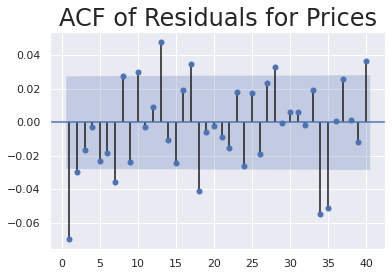

In [ ]:
sgt.plot_acf(df.res_price, zero = False, lags =40)
plt.title("ACF of Residuals for Prices", size=24)
plt.show()

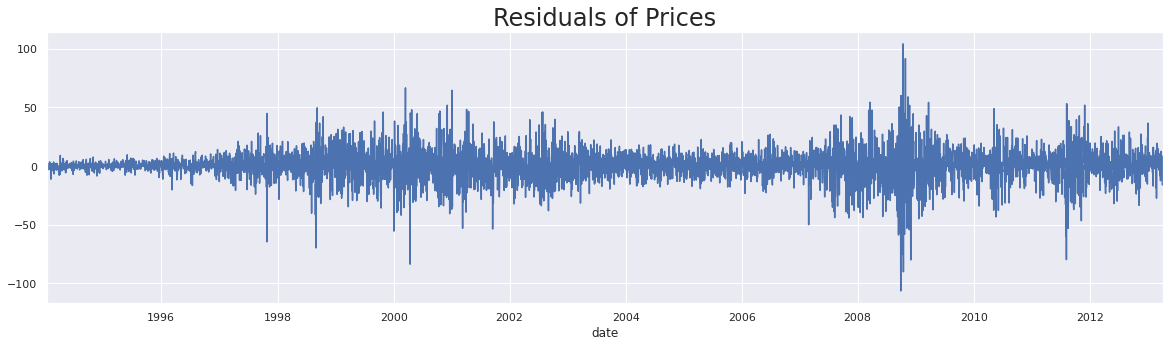

In [ ]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices", size=24)
plt.show()